In [1]:
# import relevant libraries

import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import math

import warnings

In [2]:
# set options
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
# read clean Open 2019 dataset
df_19 = pd.read_csv('./data/2019_opens_clean.csv')

In [4]:
df_19 = df_19.loc[:, ~df_19.columns.str.contains('^Unnamed')]

In [5]:
df_19.head()

,competitorid,firstname,lastname,gender,countryoforigincode,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division,rank_1,rank_2,rank_3,rank_4,rank_5,time_1,time_2,time_3,time_4,time_5,scaled_1,scaled_2,scaled_3,scaled_4,scaled_5,score_1,score_2,score_3,score_4,score_5,bs_backsquat,bs_cleanandjerk,bs_snatch,bs_deadlift,bs_fightgonebad,bs_maxpull_ups,bs_fran,bs_grace,bs_helen,bs_filthy50,bs_sprint400m,bs_run5k,w1_reps_total,w1_reps_wbs,w1_cals_row,w1_rounds_completed,w2_reps_total,w2_reps_t2b,w2_reps_du,w2_reps_sqcl,w2_rounds_completed,w2_tiebreak,w3_reps_total,w3_5ft_reps_ohl,w3_reps_dbbsu,w3_reps_hspu,w3_hspu_status,w3_5ft_reps_hsw,w3_rounds_completed,w3_tiebreak,w4_reps_total,w4_reps_sn,w4_reps_bp,w4_reps_bmu,w4_bmu_status,w4_rounds_completed,w4_tiebreak,w5_reps_total,w5_reps_thr,w5_reps_c2bpu,w5_rounds_completed,BMI
0,86,Justin,Bergh,M,US,19273,CrossFit HQ,37.0,1.96,102.06,53022,304948,0,Men (35-39),15232,58534,59298,85576,86308,900.0,480.0,600.0,720.0,1200.0,0,0,0,0,0,13040000,11670764,10980237,10720255,11350000,151.0,120.0,95.0,188.0,393.0,32.0,226.0,174.0,496.0,1287.0,64.0,1325.0,304.0,152.0,152.0,8.00,167.0,50.0,100.0,17.0,1.88,436.0,98.0,40.0,50.0,8.0,1.0,0.0,2.16,363.0,72.0,30.0,36.0,6.0,1.0,1.09,465.0,135.0,75.0,60.0,2.36,26.567055
1,88,Cary,Hair,M,US,625,CrossFit Santa Cruz,34.0,1.83,86.64,4361,37192,0,Men,5891,5456,7199,13060,5586,900.0,720.0,600.0,720.0,882.0,0,0,0,0,0,13240000,12620599,11330328,11170505,12100318,206.0,142.0,120.0,234.0,407.0,54.0,140.0,109.0,448.0,1103.0,54.0,1294.0,324.0,171.0,153.0,8.53,262.0,75.0,150.0,37.0,2.98,601.0,133.0,40.0,50.0,43.0,1.0,0.0,2.86,NaN,117.0,30.0,60.0,27.0,1.0,1.77,215.0,210.0,105.0,105.0,5.00,25.871182
2,92,Tim,Chan,M,US,20635,CrossFit SoCal,49.0,1.68,73.03,117405,564929,0,Men (45-49),155079,102548,127946,76177,103179,900.0,480.0,600.0,720.0,1200.0,0,0,0,0,0,11710000,11021027,10510000,10770250,11090000,102.0,92.0,70.0,138.0,NaN,35.0,262.0,281.0,645.0,1661.0,NaN,NaN,171.0,95.0,76.0,4.50,102.0,37.0,50.0,15.0,1.14,173.0,51.0,40.0,11.0,0.0,0.0,0.0,1.22,600.0,77.0,30.0,37.0,10.0,1.0,1.17,470.0,109.0,60.0,49.0,1.80,25.875142
3,93,Leif,Edmundson,M,US,19273,CrossFit HQ,37.0,1.83,92.99,38765,237798,0,Men (35-39),50223,39468,78855,40425,28827,900.0,480.0,600.0,720.0,1200.0,0,0,0,0,0,12670000,11720803,10920171,10970472,12010000,138.0,106.0,83.0,161.0,403.0,45.0,220.0,154.0,493.0,1500.0,62.0,1239.0,267.0,134.0,133.0,7.03,172.0,50.0,100.0,22.0,1.93,397.0,92.0,40.0,50.0,2.0,1.0,0.0,2.04,429.0,97.0,30.0,48.0,19.0,1.0,1.47,248.0,201.0,105.0,96.0,4.50,27.767327
4,1617,John,Mclaughlin,M,US,4896,CrossFit Palm Beach,51.0,1.78,84.82,12050,89855,0,Men (50-54),12686,26138,26923,13629,10479,900.0,480.0,600.0,720.0,999.0,0,0,0,0,0,13080000,11760858,11130242,11170482,12100201,161.0,115.0,88.0,197.0,NaN,50.0,146.0,154.0,444.0,NaN,NaN,NaN,308.0,156.0,152.0,8.11,176.0,50.0,100.0,26.0,1.98,342.0,113.0,40.0,50.0,23.0,1.0,0.0,2.46,358.0,117.0,30.0,60.0,27.0,1.0,1.77,238.0,210.0,105.0,105.0,5.00,26.770610


In [6]:
#profile = ProfileReport(df_19, title="Pandas Profiling Report", explorative=True, minimal=True)
#profile

In [7]:
df_19.columns

Index(['competitorid', 'firstname', 'lastname', 'gender',
       'countryoforigincode', 'affiliateid', 'affiliatename', 'age', 'height',
       'weight', 'overallrank', 'overallscore', 'is_scaled', 'division',
       'rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5', 'time_1', 'time_2',
       'time_3', 'time_4', 'time_5', 'scaled_1', 'scaled_2', 'scaled_3',
       'scaled_4', 'scaled_5', 'score_1', 'score_2', 'score_3', 'score_4',
       'score_5', 'bs_backsquat', 'bs_cleanandjerk', 'bs_snatch',
       'bs_deadlift', 'bs_fightgonebad', 'bs_maxpull_ups', 'bs_fran',
       'bs_grace', 'bs_helen', 'bs_filthy50', 'bs_sprint400m', 'bs_run5k',
       'w1_reps_total', 'w1_reps_wbs', 'w1_cals_row', 'w1_rounds_completed',
       'w2_reps_total', 'w2_reps_t2b', 'w2_reps_du', 'w2_reps_sqcl',
       'w2_rounds_completed', 'w2_tiebreak', 'w3_reps_total',
       'w3_5ft_reps_ohl', 'w3_reps_dbbsu', 'w3_reps_hspu', 'w3_hspu_status',
       'w3_5ft_reps_hsw', 'w3_rounds_completed', 'w3_tiebreak',
     

In [8]:
col_list = ['competitorid', 'firstname', 'lastname', 'gender',
       'countryoforigincode', 'affiliateid', 'affiliatename', 'age', 'height',
       'weight', 'overallrank', 'overallscore', 'is_scaled', 'division',
       'rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5', 'time_1', 'time_2',
       'time_3', 'time_4', 'time_5', 'scaled_1', 'scaled_2', 'scaled_3',
       'scaled_4', 'scaled_5', 'score_1', 'score_2', 'score_3', 'score_4',
       'score_5', 'bs_backsquat', 'bs_cleanandjerk', 'bs_snatch',
       'bs_deadlift', 'bs_fightgonebad', 'bs_maxpull_ups', 'bs_fran',
       'bs_grace', 'bs_helen', 'bs_filthy50', 'bs_sprint400m', 'bs_run5k',
       'w1_reps_total', 'w1_reps_wbs', 'w1_cals_row', 'w1_rounds_completed',
       'w2_reps_total', 'w2_reps_t2b', 'w2_reps_du', 'w2_reps_sqcl',
       'w2_rounds_completed', 'w2_tiebreak', 'w3_reps_total',
       'w3_5ft_reps_ohl', 'w3_reps_dbbsu', 'w3_reps_hspu', 'w3_hspu_status',
       'w3_5ft_reps_hsw', 'w3_rounds_completed', 'w3_tiebreak',
       'w4_reps_total', 'w4_reps_sn', 'w4_reps_bp', 'w4_reps_bmu',
       'w4_bmu_status', 'w4_rounds_completed', 'w4_tiebreak', 'w5_reps_total',
       'w5_reps_thr', 'w5_reps_c2bpu', 'w5_rounds_completed', 'BMI']

In [9]:
len(col_list)

76

#### features to hue: (8)
* gender
* region (created out of countries)
* top_athletes
* is_scaled
* completed before timecap
* HSPU status
* BMU status

#### features to pairplot (29)
* affiliateid
* age
* height
* weight
* overallscore
* time_i (2-5)
* bs_backsquat
* bs_cleanandjerk
* bs_snatch
* bs_deadlift
* bs_fightgonebad
* bs_maxpull_ups
* bs_fran
* bs_grace
* bs_helen
* bs_filthy50
* bs_sprint400m
* bs_run5k
* wi_reps_total (5)
* w2_tiebreak
* w3_tiebreak
* w4_tiebreak

In [23]:
df_rand = df_19.sample(frac=0.002, random_state=42)

In [24]:
df_rand.shape

(677, 76)

In [27]:
feat_1 = ['affiliateid','age','height','weight','overallscore','time_2','time_3']
feat_2 = ['time_4','bs_backsquat','bs_cleanandjerk','bs_snatch','bs_deadlift','bs_fightgonebad','bs_maxpull_ups']
feat_3 = ['bs_fran','bs_grace','bs_helen','bs_filthy50','bs_sprint400m','bs_run5k','w1_reps_total']
feat_4 = ['w2_reps_total','w3_reps_total','w4_reps_total','w5_reps_total','w2_tiebreak','w3_tiebreak','w4_tiebreak']

In [57]:
# TOP Athletes: overallrank from 1 to 185550
# 
#   1% -->     1 <= x <    1855
#   5% -->  1856 <= x <    9277
#  25% -->  9278 <= x <   46387
#  50% --> 46388 <= x <   92775
# rest --> 92776 <= x <= 185550

In [64]:
# create new feature: top_athletes
overallrank_list = df_rand['overallrank'].to_list()
top_athletes = []
for i in overallrank_list:
    if i > 0 and i < 1855:
        top_athletes.append('top_01')
    elif i >= 1856 and i < 9277:
        top_athletes.append('top_05')
    elif i >= 9278 and i < 46387:
        top_athletes.append('top_25')
    elif i >= 46388 and i < 92775:
        top_athletes.append('top_50')
    elif i >= 92776 and i <= 185550:
        top_athletes.append('rest')
    else:
        top_athletes.append(np.NaN)
df_rand['top_athletes'] = top_athletes

In [79]:
df_rand['w4_bmu_status'].replace([1.0,0.0,np.NaN],['Yes','No','unknown'],inplace=True)

In [81]:
df_rand['w3_hspu_status'].replace([1.0,0.0,np.NaN],['Yes','No','unknown'],inplace=True)

In [82]:
df_rand['w3_hspu_status'].head()

71923         Yes
85792     unknown
9922           No
285702    unknown
159839         No
Name: w3_hspu_status, dtype: object

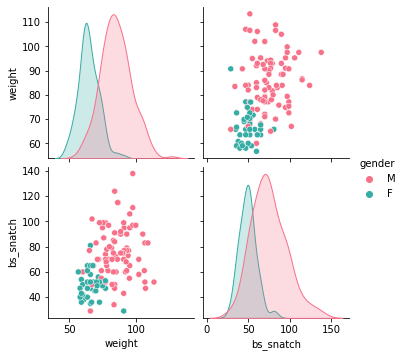

In [95]:
i = 'gender'

sns.pairplot(data=df_rand[['weight','bs_snatch',i]],hue=i,palette="husl");